# Case Study 1 - Super Conductor
- Build an interpretable model to predict the Critical Temperature as closely as possible. 
- Include a write up to which variables carry the most importance. 

# CRISP - DM 

## Business Understanding

- Context:
    - **Super Conductors are materials that give little or no resistance to electrical current.**

- What does the business need? 
    - Business would like to have a model which will predict new superconductors based on the properties and the data they have thus far. 
    - Data thus far will be various characteristics such as material composition, temperature at which they superconduct. 
    - Business re-iterates that we want to predict new superconductors AND the temperature which they operate based on experiemental inputs from the data they have already. 
    - Must be interpretable so they can figure out at what temperature new superconductors would become super conductors, not only if they would be superconductors.

<hr>

## Data Understanding 

- Metadata file should be available to descrie each of the columns
- Business has relative imporatance of specific features. 

**Further Questions**
- Can we assume that each of these rows (observations) are a super conductor? 
- Are we assuming that the 'Critical Temperature' feature is the temperature at which a superconductor becomes a superconductor? 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [3]:
df1 = pd.read_csv('unique_m.csv')
df1.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [4]:
df1.drop(['material','critical_temp'], axis = 1, inplace = True)
df = pd.concat([df,df1], axis =1)

In [5]:
df.shape

(21263, 168)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Columns: 168 entries, number_of_elements to Rn
dtypes: float64(156), int64(12)
memory usage: 27.3 MB


In [7]:
df['critical_temp'].describe()

count    21263.000000
mean        34.421219
std         34.254362
min          0.000210
25%          5.365000
50%         20.000000
75%         63.000000
max        185.000000
Name: critical_temp, dtype: float64

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
number_of_elements,21263.0,4.115224,1.439295,1.000000,3.000000,4.000000,5.000000,9.0000
mean_atomic_mass,21263.0,87.557631,29.676497,6.941000,72.458076,84.922750,100.404410,208.9804
wtd_mean_atomic_mass,21263.0,72.988310,33.490406,6.423452,52.143839,60.696571,86.103540,208.9804
gmean_atomic_mass,21263.0,71.290627,31.030272,5.320573,58.041225,66.361592,78.116681,208.9804
wtd_gmean_atomic_mass,21263.0,58.539916,36.651067,1.960849,35.248990,39.918385,73.113234,208.9804
...,...,...,...,...,...,...,...,...
Pb,21263.0,0.042461,0.274365,0.000000,0.000000,0.000000,0.000000,19.0000
Bi,21263.0,0.201009,0.655927,0.000000,0.000000,0.000000,0.000000,14.0000
Po,21263.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
At,21263.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000


In [9]:
df.isna().sum()

number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
Pb                       0
Bi                       0
Po                       0
At                       0
Rn                       0
Length: 168, dtype: int64

# Inspecting Target Variable

In [10]:
from scipy.stats import zscore

z_scores = zscore(df['critical_temp'])

threshold = 2.5
outliers = (z_scores > threshold) | (z_scores < -threshold)

df = df[~outliers]

In [11]:
from scipy.stats import boxcox

shift_value = .01
shifted_data = df['critical_temp'] + shift_value

transformed_data, lambda_value = boxcox(shifted_data)

df['critical_temp_transform'] = transformed_data

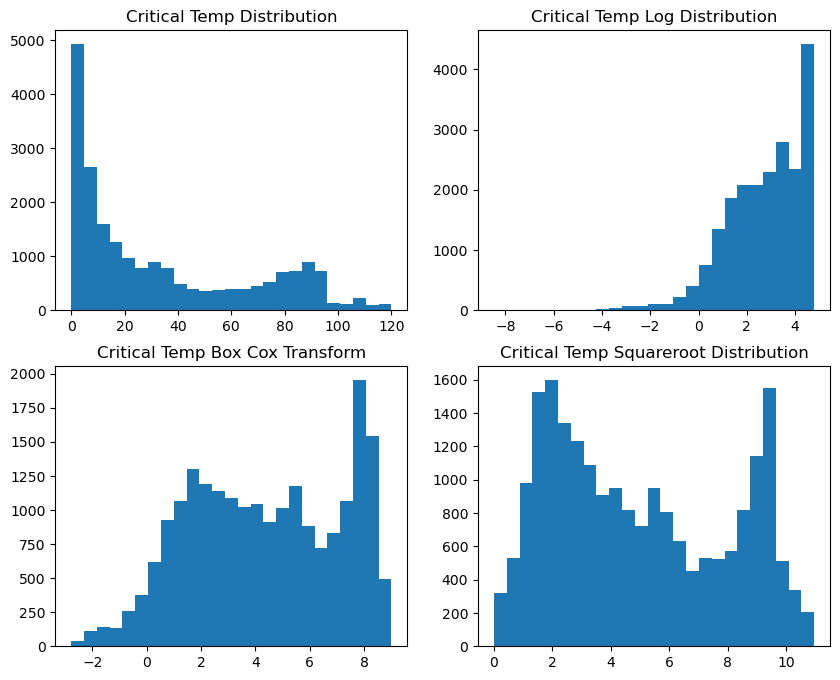

In [12]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))
axes[0,0].hist(df['critical_temp'], bins = 25)
axes[0,0].set_title('Critical Temp Distribution')

axes[0,1].hist(np.log(df['critical_temp']), bins = 25)
axes[0,1].set_title('Critical Temp Log Distribution')

axes[1,1].hist(np.sqrt(df['critical_temp']), bins = 25)
axes[1,1].set_title('Critical Temp Squareroot Distribution')

axes[1,0].hist(df['critical_temp_transform'], bins = 25)
axes[1,0].set_title('Critical Temp Box Cox Transform')



plt.show()

In [13]:
df.drop('critical_temp', axis = 1, inplace = True)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Extract the target variable
target = df['critical_temp_transform']

# Drop the target variable from the DataFrame
features = df.drop(columns=['critical_temp_transform'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training features and transform them
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing features using the same scaler
X_test_scaled = scaler.transform(X_test)

# Create DataFrames for scaled features
scaled_X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# reset the index for y_train before assigning it
y_train_reset = y_train.reset_index(drop=True)

scaled_X_train_df['critical_temp_transform'] = y_train_reset

# reset the index for y_test before assigning it
y_test_reset = y_test.reset_index(drop=True)

# Create a DataFrame for scaled test features
scaled_X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
scaled_X_test_df['critical_temp_transform'] = y_test_reset

In [15]:
correlation_data = scaled_X_train_df.corr()
correlation_target = correlation_data['critical_temp_transform']

In [16]:
correlation_target.nsmallest(10)

wtd_mean_Valence          -0.678709
wtd_gmean_Valence         -0.666647
mean_Valence              -0.653591
wtd_gmean_Density         -0.650035
gmean_Density             -0.645729
gmean_Valence             -0.630999
wtd_mean_Density          -0.551511
wtd_gmean_atomic_radius   -0.495646
wtd_gmean_atomic_mass     -0.483670
mean_Density              -0.483565
Name: critical_temp_transform, dtype: float64

In [17]:
correlation_target.nlargest(15)

critical_temp_transform        1.000000
wtd_std_ThermalConductivity    0.732969
range_atomic_radius            0.724651
range_ThermalConductivity      0.714796
wtd_std_atomic_radius          0.683091
wtd_entropy_atomic_mass        0.677032
std_ThermalConductivity        0.673987
range_fie                      0.673771
entropy_Valence                0.669750
number_of_elements             0.664548
wtd_entropy_atomic_radius      0.663118
wtd_std_fie                    0.662906
entropy_fie                    0.640897
std_atomic_radius              0.639959
wtd_entropy_Valence            0.639683
Name: critical_temp_transform, dtype: float64

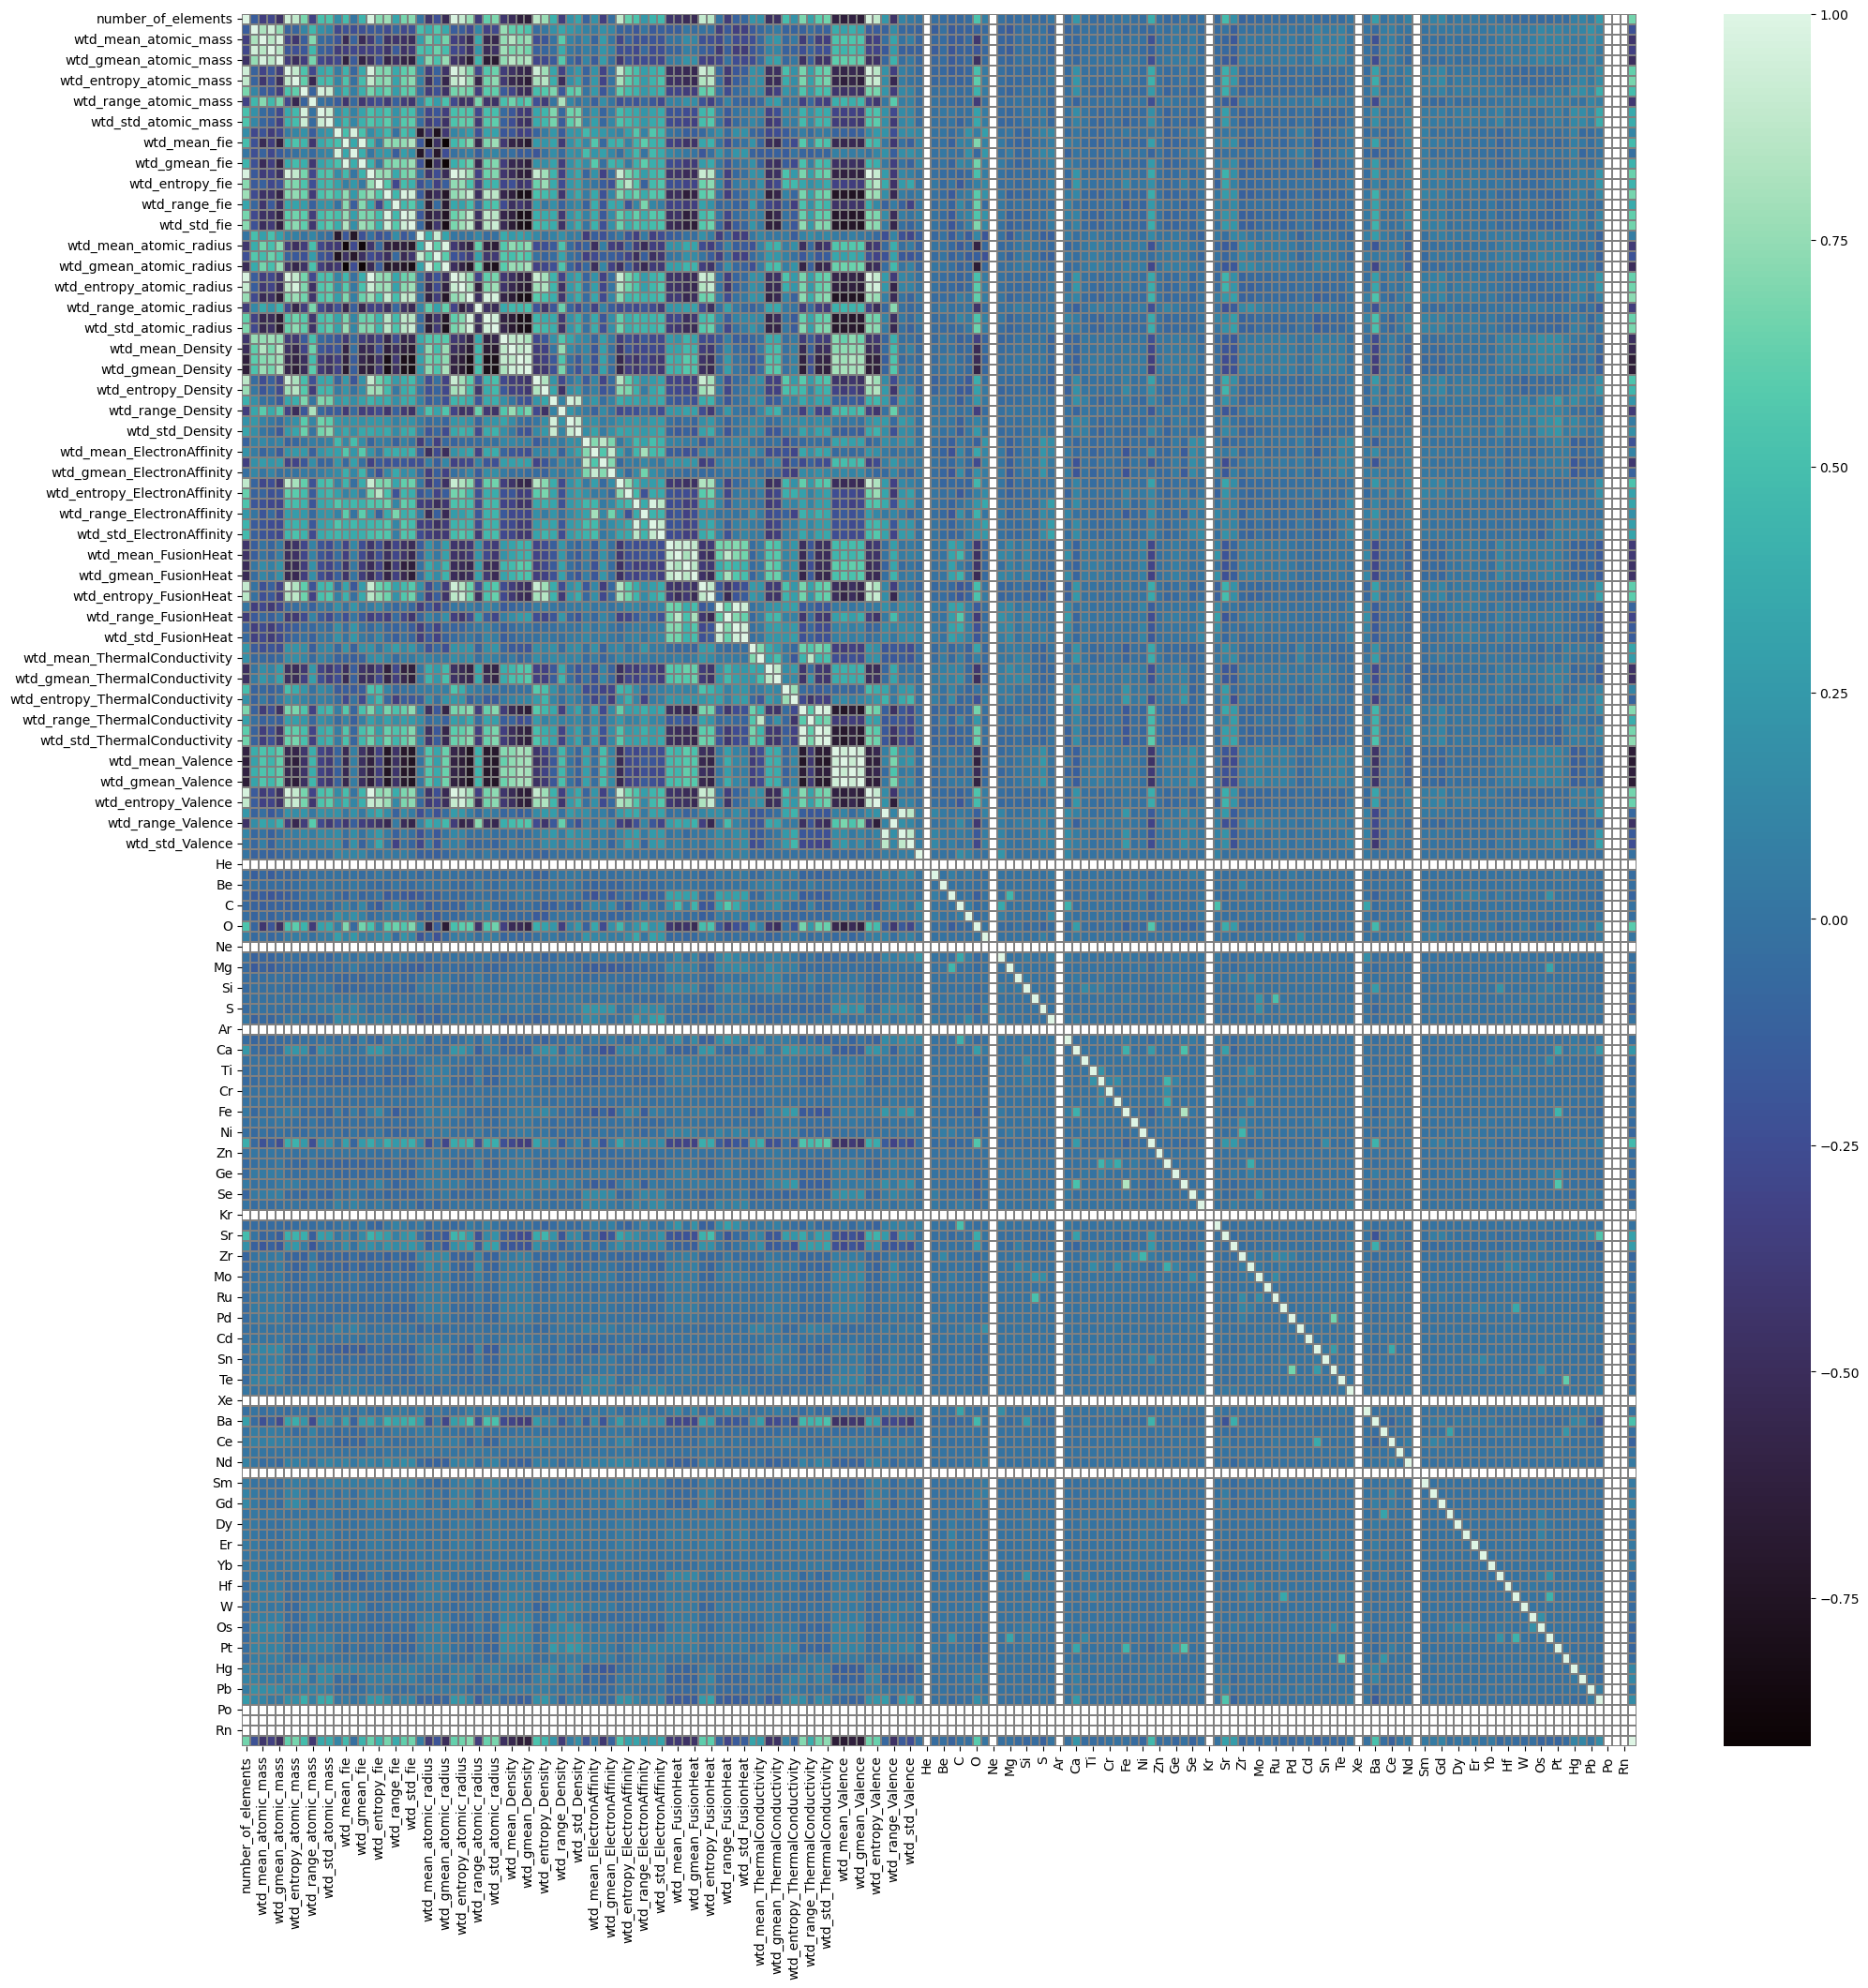

In [18]:
plt.figure(figsize=(24,24))
sns.heatmap(correlation_data,linecolor='grey', cmap = 'mako', linewidths=.01)
plt.show()

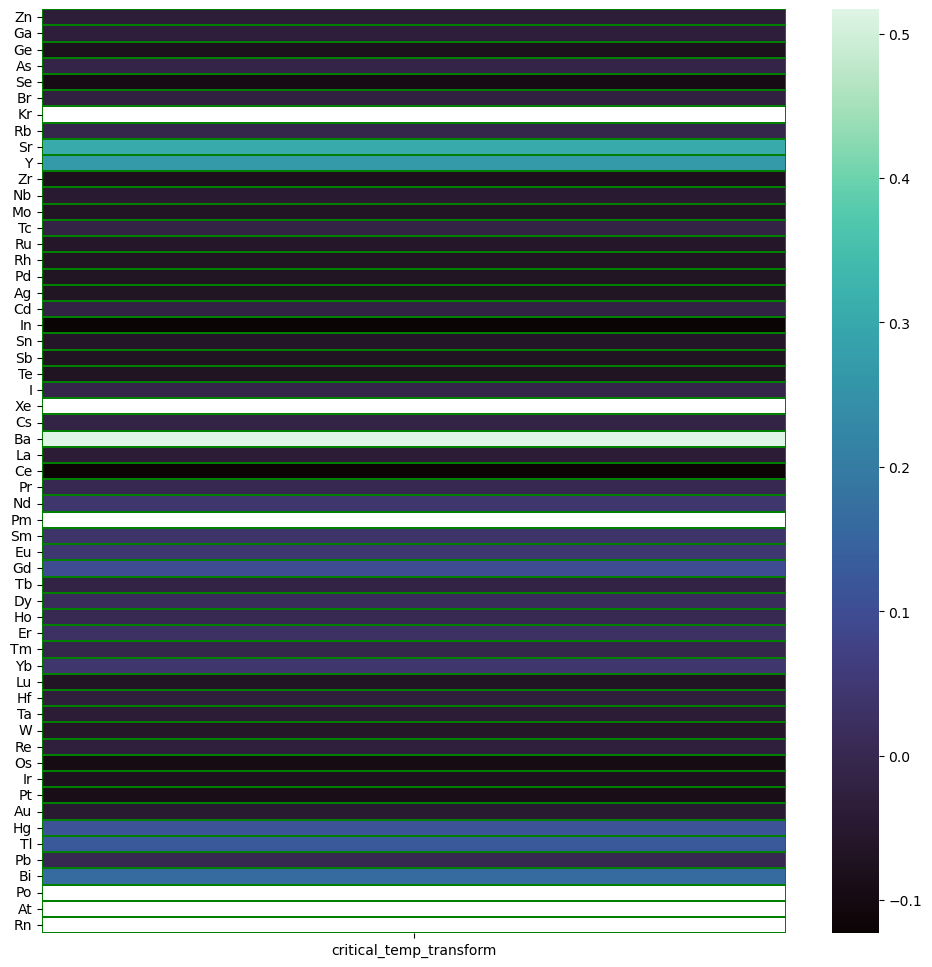

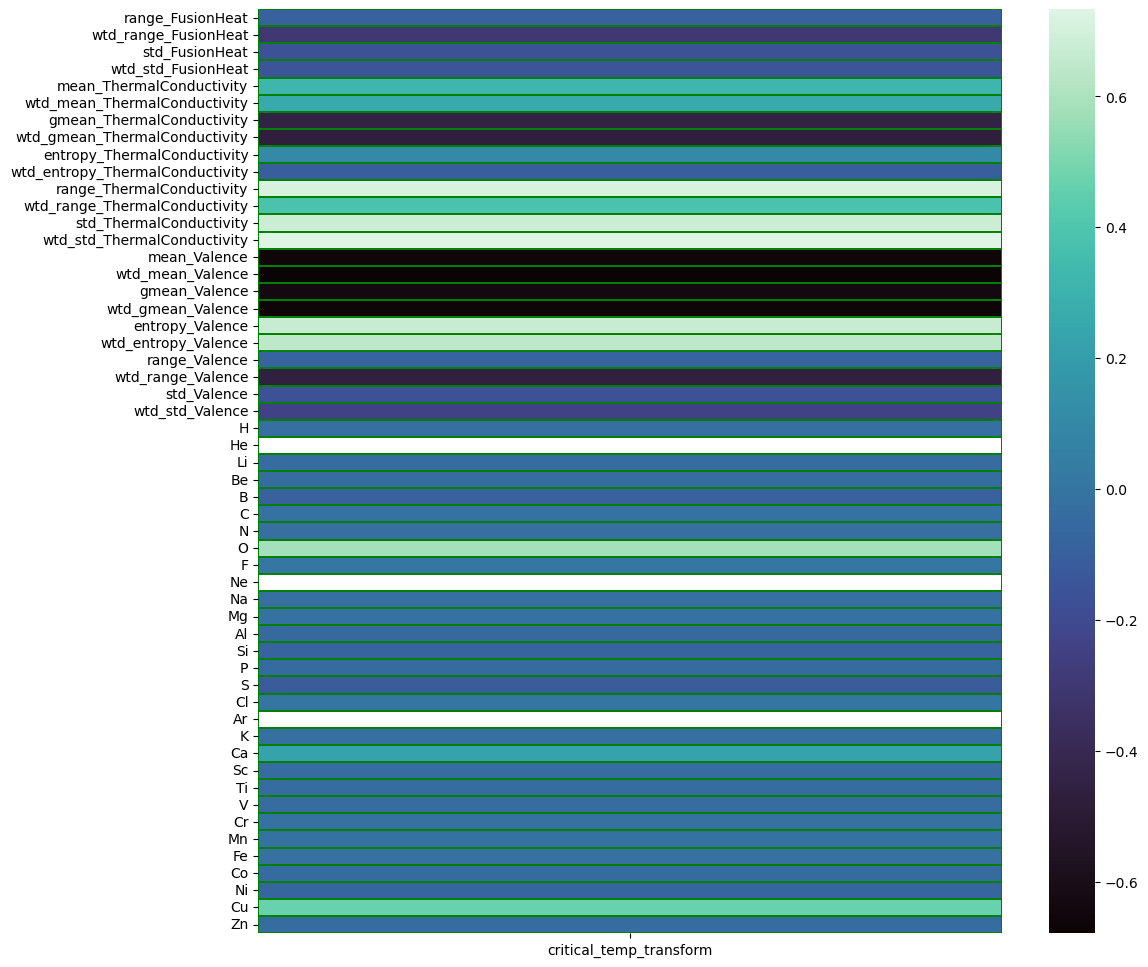

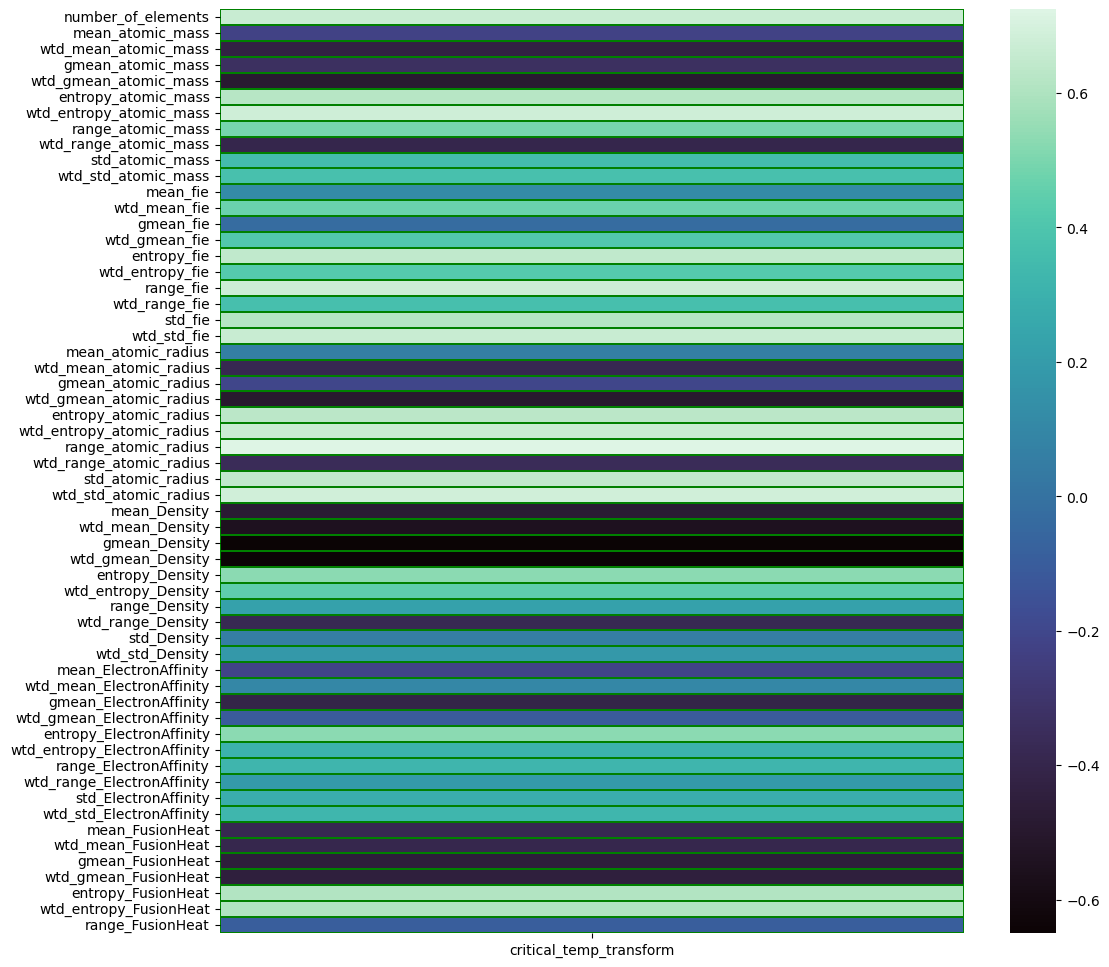

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(correlation_data.iloc[110:167,167:168] ,linecolor='green', cmap = 'mako', linewidths=.1)
plt.show()

plt.figure(figsize=(12,12))
sns.heatmap(correlation_data.iloc[57:111,167:168] ,linecolor='green', cmap = 'mako', linewidths=.1)
plt.show()

plt.figure(figsize=(12,12))
sns.heatmap(correlation_data.iloc[0:58,167:168] ,linecolor='green', cmap = 'mako', linewidths=.1)
plt.show()

In [29]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Create a Lasso regression model
lasso = Lasso()

# Define a range of alpha (lambda) values for the GridSearch
alphas = [0.01, 0.05, 0.1, 0.2, 1, 10]

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=lasso, param_grid={'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search on training data
grid_search.fit(X_train_scaled, y_train)

# Get the best alpha from the search
best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha: {best_alpha:.6f}')

# Fit Lasso with the best alpha on the entire training data
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = lasso_best.predict(X_test_scaled)

best_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha: {best_alpha:.6f}")

# Calculate RMSE on the test data
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

selected_features = X_train.columns[lasso_best.coef_ != 0]
print('Selected_features', "\n", selected_features)

Best alpha: 0.010000
Best Alpha: 0.010000
Root Mean Squared Error (RMSE): 1.3396
Selected_features 
 Index(['wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'wtd_std_atomic_mass', 'range_fie', 'wtd_mean_atomic_radius',
       'gmean_atomic_radius', 'range_atomic_radius', 'wtd_std_atomic_radius',
       'wtd_mean_Density', 'gmean_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'wtd_std_Density',
       'wtd_gmean_ElectronAffinity', 'wtd_entropy_ElectronAffinity',
       'wtd_range_ElectronAffinity', 'std_ElectronAffinity',
       'wtd_std_ElectronAffinity', 'wtd_gmean_FusionHeat',
       'wtd_entropy_FusionHeat', 'wtd_std_FusionHeat',
       'wtd_mean_ThermalConductivity', 'gmean_ThermalConductivity',
       'wtd_gmean_ThermalConductivity', 'entropy_ThermalConductivity',
       'wtd_entropy_ThermalConductivity', 'wtd_range_ThermalConductivity',
       'wtd_std_ThermalConductivity', 'gmean_Valence', 'wtd_gmean_Valence',
       

In [21]:
# Create a Lasso regression model with a specific alpha value
alpha = .15 # Specify the alpha value
lasso_model = Lasso(alpha=alpha)

# Fit the Lasso model on the scaled training data
lasso_model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = lasso_model.predict(X_test_scaled)

# Calculate RMSE on the test data
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

# Retrieve the selected features using nonzero coefficients
selected_features = X_train.columns[lasso_model.coef_ != 0]
print('Selected Features: ', selected_features)

Root Mean Squared Error (RMSE): 1.4974
Selected Features:  Index(['number_of_elements', 'wtd_entropy_atomic_mass', 'range_fie',
       'range_atomic_radius', 'gmean_Density', 'gmean_ElectronAffinity',
       'wtd_gmean_ElectronAffinity', 'wtd_gmean_ThermalConductivity',
       'wtd_std_ThermalConductivity', 'wtd_std_Valence', 'O', 'Si', 'Ca', 'Sr',
       'Ag', 'Ba', 'Ce', 'Bi'],
      dtype='object')


In [22]:
selected_features = ['number_of_elements', 'wtd_entropy_atomic_mass', 'range_fie',
                     'gmean_Density', 'gmean_ElectronAffinity','wtd_gmean_ElectronAffinity',
                     'wtd_gmean_ThermalConductivity','wtd_std_ThermalConductivity',
                     'wtd_std_Valence', 'O', 'Si', 'Ca', 'Sr','Ag', 'Ba', 'Ce', 'Bi']

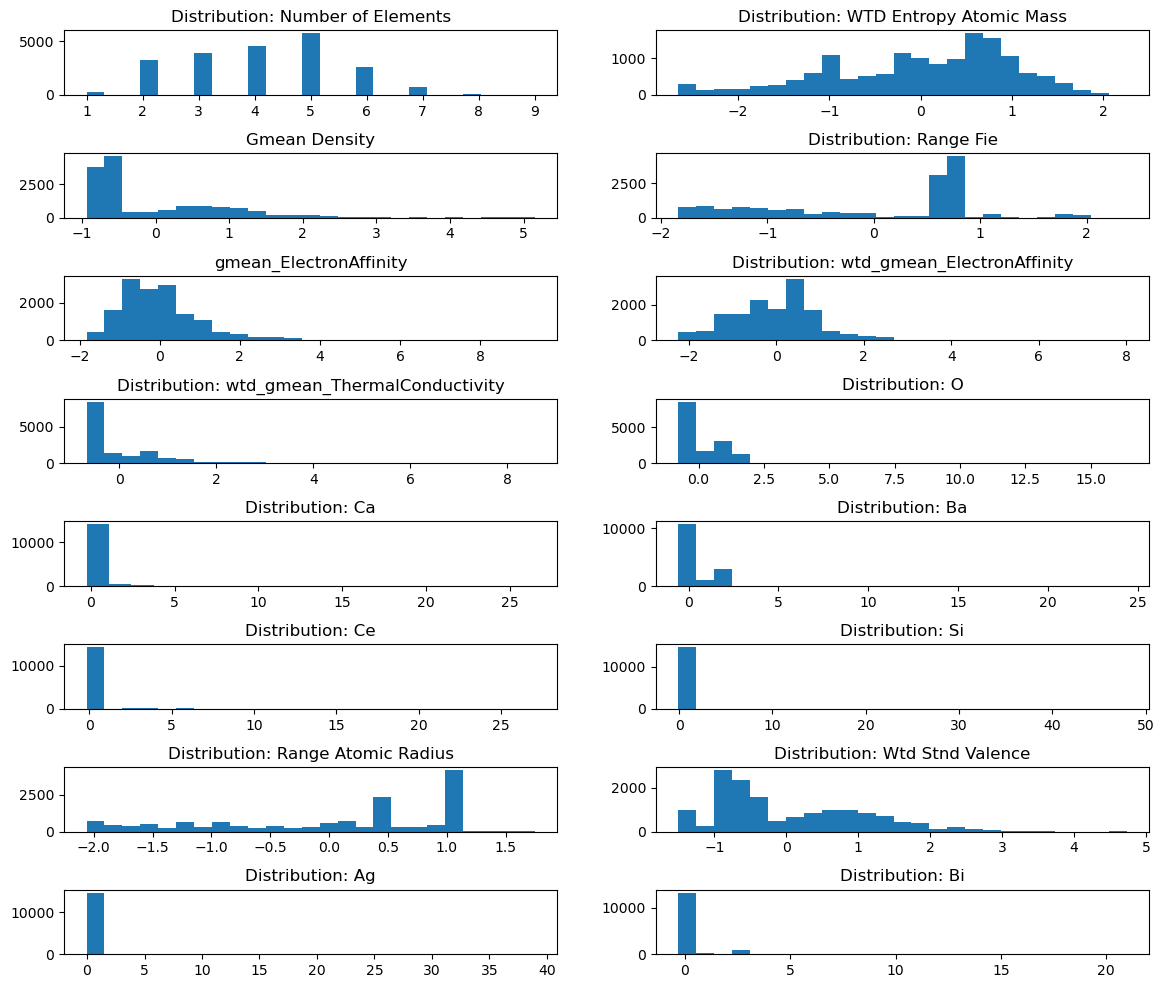

In [30]:
fig, axes = plt.subplots(nrows = 8, ncols = 2, figsize = (14,12))
axes[0,0].hist(df['number_of_elements'], bins = 25)
axes[0,0].set_title('Distribution: Number of Elements')

axes[0,1].hist(scaled_X_train_df['wtd_entropy_atomic_mass'], bins = 25)
axes[0,1].set_title('Distribution: WTD Entropy Atomic Mass')

axes[1,1].hist(scaled_X_train_df['range_fie'], bins = 25)
axes[1,1].set_title('Distribution: Range Fie')

axes[1,0].hist(scaled_X_train_df['gmean_Density'], bins = 25)
axes[1,0].set_title('Gmean Density')

axes[2,0].hist(scaled_X_train_df['gmean_ElectronAffinity'], bins = 25)
axes[2,0].set_title('gmean_ElectronAffinity')

axes[2,1].hist(scaled_X_train_df['wtd_gmean_ElectronAffinity'], bins = 25)
axes[2,1].set_title('Distribution: wtd_gmean_ElectronAffinity')

axes[3,0].hist(scaled_X_train_df['wtd_gmean_ThermalConductivity'], bins = 25)
axes[3,0].set_title('Distribution: wtd_gmean_ThermalConductivity')

axes[3,1].hist(scaled_X_train_df['O'], bins= 25)
axes[3,1].set_title('Distribution: O')

axes[4,0].hist(scaled_X_train_df['Ca'], bins = 20)
axes[4,0].set_title('Distribution: Ca')

axes[4,1].hist(scaled_X_train_df['Ba'], bins = 25)
axes[4,1].set_title('Distribution: Ba')

axes[5,0].hist(scaled_X_train_df['Ce'], bins = 25)
axes[5,0].set_title('Distribution: Ce')

axes[5,1].hist(scaled_X_train_df['Si'], bins = 25)
axes[5,1].set_title('Distribution: Si')

axes[6,0].hist(scaled_X_train_df['range_atomic_radius'], bins = 25)
axes[6,0].set_title('Distribution: Range Atomic Radius')

axes[6,1].hist(scaled_X_train_df['wtd_std_Valence'], bins = 25)
axes[6,1].set_title('Distribution: Wtd Stnd Valence')

axes[7,0].hist(scaled_X_train_df['Ag'], bins = 25)
axes[7,0].set_title('Distribution: Ag')

axes[7,1].hist(scaled_X_train_df['Bi'], bins = 25)
axes[7,1].set_title('Distribution: Bi')

plt.subplots_adjust(hspace = .9)
plt.show()

# <span style='color:red'> Potential Transforms Needed prior to scale</span>

# Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

X_train_selected = scaled_X_train_df[selected_features]
y_train_selected = scaled_X_train_df['critical_temp_transform']

X_test_selected = scaled_X_test_df[selected_features]
y_test_selected = scaled_X_test_df['critical_temp_transform']

# Add a constant term to the features
X_train_selected_with_const = sm.add_constant(X_train_selected)
X_test_selected_with_const = sm.add_constant(X_test_selected)

# Create and fit the linear regression model
linear_model = sm.OLS(y_train_selected, X_train_selected_with_const).fit()

# Print the model summary
print(linear_model.summary())

                               OLS Regression Results                              
Dep. Variable:     critical_temp_transform   R-squared:                       0.724
Model:                                 OLS   Adj. R-squared:                  0.724
Method:                      Least Squares   F-statistic:                     2273.
Date:                     Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                             08:41:02   Log-Likelihood:                -26406.
No. Observations:                    14734   AIC:                         5.285e+04
Df Residuals:                        14716   BIC:                         5.298e+04
Df Model:                               17                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

## Predictions | Adj. R2 | RMSE | MSE

In [25]:
# Calculate predictions on test data
y_pred = linear_model.predict(X_test_selected_with_const)

# Calculate Adjusted R-squared
num_features = len(selected_features) + 1  # Including the constant term
adj_r2 = 1 - (1 - linear_model.rsquared) * ((len(y_train_selected) - 1) / (len(y_train_selected) - num_features))

# Calculate RMSE and MSE
rmse = mean_squared_error(y_test_selected, y_pred, squared=False)
mse = mean_squared_error(y_test_selected, y_pred)

print(f'Adjusted R-squared: {adj_r2:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')

Adjusted R-squared: 0.7238
Root Mean Squared Error (RMSE): 1.4414
Mean Squared Error (MSE): 2.0776


## Variance Inflation Factor - Multicollinearity Check

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = X_train_selected_with_const.drop('const', axis=1)  # Exclude the constant term
vif_values = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

# Print VIF values for each feature
for i, feature in enumerate(vif_data.columns):
    print(f'VIF for {feature}: {vif_values[i]:.4f}')


VIF for number_of_elements: 6.5501
VIF for wtd_entropy_atomic_mass: 5.7515
VIF for range_fie: 5.6932
VIF for gmean_Density: 3.4066
VIF for gmean_ElectronAffinity: 3.4907
VIF for wtd_gmean_ElectronAffinity: 3.5966
VIF for wtd_gmean_ThermalConductivity: 1.7727
VIF for wtd_std_ThermalConductivity: 3.3281
VIF for wtd_std_Valence: 1.7882
VIF for O: 3.5569
VIF for Si: 1.3270
VIF for Ca: 1.3461
VIF for Sr: 2.7645
VIF for Ag: 1.0400
VIF for Ba: 2.9062
VIF for Ce: 1.0512
VIF for Bi: 1.6658


# Model Assumptions Plot

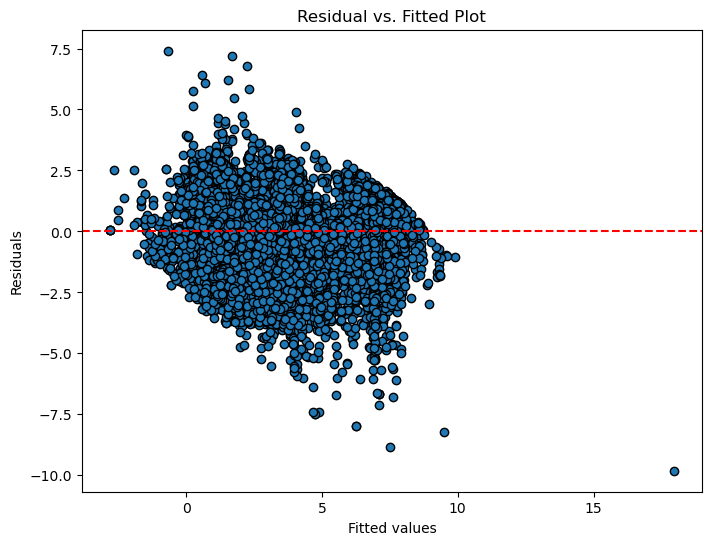

<Figure size 800x600 with 0 Axes>

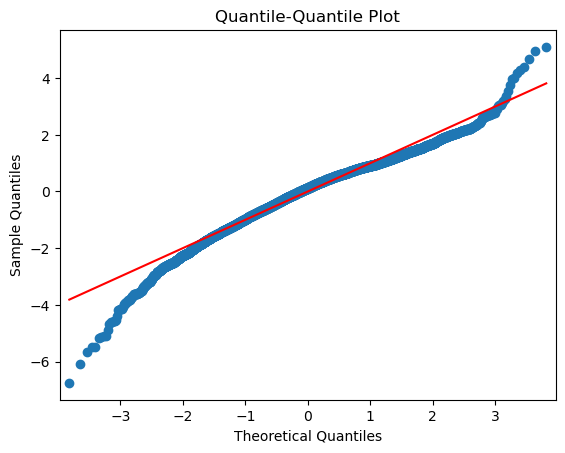

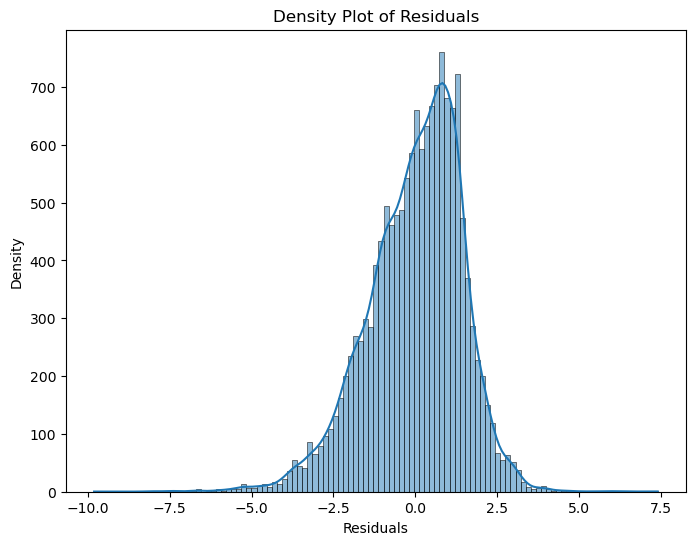

In [27]:
# Calculate residuals
residuals = linear_model.resid

# Residual vs. Fitted Plot
plt.figure(figsize=(8, 6))
plt.scatter(linear_model.fittedvalues, residuals, edgecolor='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual vs. Fitted Plot')
plt.show()

# Q-Q Plot
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='s', fit=True)
plt.title('Quantile-Quantile Plot')
plt.show()

# Create a density plot of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Density Plot of Residuals')
plt.show()

# Linear Regression Model - Original Scale RMSE

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy.special import inv_boxcox


X_train_selected = scaled_X_train_df[selected_features]
y_train_selected = scaled_X_train_df['critical_temp_transform']

X_test_selected = scaled_X_test_df[selected_features]
y_test_selected = scaled_X_test_df['critical_temp_transform']

# Add a constant term to the features
X_train_selected_with_const = sm.add_constant(X_train_selected)
X_test_selected_with_const = sm.add_constant(X_test_selected)

linear_model = sm.OLS(y_train_selected, X_train_selected_with_const).fit()

# Print the model summary
print(linear_model.summary())

# Calculate predictions on test data
y_pred_transformed = linear_model.predict(X_test_selected_with_const)

# Inverse transform predictions and actual test target values
y_pred_original = inv_boxcox(y_pred_transformed, lambda_value)
y_test_original = inv_boxcox(y_test_selected, lambda_value)

# Calculate Adjusted R-squared
num_features = len(selected_features) + 1  # Including the constant term
adj_r2 = 1 - (1 - linear_model.rsquared) * ((len(y_train_selected) - 1) / (len(y_train_selected) - num_features))

# Calculate RMSE and MSE on the original scale
rmse_original = mean_squared_error(y_test_original, y_pred_original, squared=False)
mse_original = mean_squared_error(y_test_original, y_pred_original)

print(f'Adjusted R-squared: {adj_r2:.4f}')
print(f'Root Mean Squared Error (RMSE) on Original Scale: {rmse_original:.4f}')
print(f'Mean Squared Error (MSE) on Original Scale: {mse_original:.4f}')


                               OLS Regression Results                              
Dep. Variable:     critical_temp_transform   R-squared:                       0.724
Model:                                 OLS   Adj. R-squared:                  0.724
Method:                      Least Squares   F-statistic:                     2273.
Date:                     Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                             08:41:02   Log-Likelihood:                -26406.
No. Observations:                    14734   AIC:                         5.285e+04
Df Residuals:                        14716   BIC:                         5.298e+04
Df Model:                               17                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------